### Data

In [1]:
plt.style.use('bmh')
color = '#1240AB'

pd.options.display.float_format = '{:,.4f}'.format

In [3]:
df = pd.read_pickle('../data/df_sales.pkl')

df['tr_split'] = df['tr_year'].map(lambda x: '1. Before 2018' if x < '2018' else '2. After 2018')

delta = 0.05
filt = ~df['Property Size (sq.m) RANK'].between(delta,1-delta)
df.loc[filt, 'Property Size (sq.m)'] = np.nan

print(df.shape)
df[:3]

(441392, 55)


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Room(s) CLEAN,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,tr_day,tr_month,tr_quarter,tr_year,k,Price per sq.m,Amount LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Amount RANK,Property Size (sq.m) RANK,Price per sq.m RANK,reg_ready,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,Room(s) CLEAN LABEL,tr_split
0,11-12317-2022,2022-06-02 15:22:00,79102731,Sales,Sale,Ready,Commercial,AL FURJAN,Land,Commercial,"1,500,000.0000",600.5100,600.5100,NaN,0,NaN,NaN,NaN,1.0000,1.0000,NaN,,Land,Commercial,Commercial,,,,,2022-06-02,2022-06-01,2022Q2,2022,1.0000,"2,497.8768",14.2210,6.3978,7.8232,0.1093,0.6984,0.0380,1,1,JEBEL ALI 1,5.0000,6,0,0,1,3,1,4,1,1,2. After 2018
1,11-12316-2022,2022-06-02 15:07:00,132952797,Sales,Sale,Ready,Residential,AKOYA OXYGEN,Land,Residential,"815,000.0000",112.2400,NaN,NaN,0,NaN,NaN,Dubai Cycling Course,1.0000,1.0000,DAMAC HILLS (2) - AMARGO,,Land,Residential,Residential,Dubai Cycling Course,,,DAMAC HILLS (2) - AMARGO,2022-06-02,2022-06-01,2022Q2,2022,1.0000,"7,261.2259",13.6109,4.7206,8.8903,0.0236,0.0160,0.2646,1,1,AL HEBIAH 3,6.0000,8,241,0,1,8,1,1,0,1,2. After 2018
2,102-14693-2022,2022-06-02 14:56:00,1134745314,Sales,Sell - Pre registration,Off-Plan,Residential,AL FURJAN,Unit,Flat,"425,993.0000",49.4700,49.4700,Studio,1,Ibn Battuta Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,0.0000,1.0000,Prime Residency 3,Studio,Unit,Flat,Residential,Expo 2020 Site,Ibn-e-Battuta Mall,Ibn Battuta Metro Station,Prime Residency 3,2022-06-02,2022-06-01,2022Q2,2022,1.0000,"8,611.1381",12.9622,3.9014,9.0608,0.0946,0.2202,0.1723,0,1,JEBEL ALI 1,5.0000,6,452,12,5,9,0,0,0,3,2. After 2018


In [4]:
n = df.shape[0]
s = pd.concat([(df.isnull().sum()).reset_index().T, df.nunique().reset_index().T[1:], df.dtypes.reset_index().T[1:]])
s.index = ['feat','nulls','unique','type']
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
feat,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Room(s) CLEAN,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,tr_day,tr_month,tr_quarter,tr_year,k,Price per sq.m,Amount LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Amount RANK,Property Size (sq.m) RANK,Price per sq.m RANK,reg_ready,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,Room(s) CLEAN LABEL,tr_split
nulls,0,0,0,0,0,0,0,0,0,6955,0,0,44128,82178,0,111206,112212,48088,124,124,121359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35989,35989,0,0,0,0,0,0,0,0,0,0
unique,440828,324916,342477,1,18,2,2,298,3,43,117727,54581,47417,16,2,57,6,15,17,45,1369,13,3,22,2,16,7,51,963,2873,126,42,11,1,329678,117727,54236,327264,186508,159863,365290,2,2,174,9,175,963,51,7,16,3,22,2,13,2
type,object,datetime64[ns],int64,object,object,object,object,object,object,object,float64,float64,float64,object,int32,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,datetime64[ns],datetime64[ns],object,object,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,object,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object


In [11]:
# list(df.columns)

feats_id = ['Property ID']
feats_cat = [
 'region LABEL',
 'Project CLEAN LABEL',
 'Nearest Metro CLEAN LABEL',
 'Nearest Mall CLEAN LABEL',
 'Nearest Landmark CLEAN LABEL',
 'Property Type CLEAN LABEL',
 'Property Sub Type CLEAN LABEL',
 'Usage CLEAN LABEL',
 'Room(s) CLEAN LABEL',
]  
feats_dt = [
 'tr_year',
 'tr_month'
]
feats_num = [
 'Property Size (sq.m)',
 'No. of Buyer',
 'No. of Seller',
 'Parking',
 'reg_ready',
 'free_hold',
 'sector',
]
feats_rnk = [
 'Amount RANK',
 'Property Size (sq.m) RANK',
 'Price per sq.m RANK',
]

In [6]:
# add fold for splitting
# np.random.seed(1989)
df_fold = df.groupby('Property ID').size().reset_index()
df_fold['fold'] = np.random.randint(0,4,len(df_fold))
del df_fold[0]
df = df.merge(df_fold)

df['tr_year'] = df.tr_year.astype(int)
df['tr_month'] = df.tr_day.dt.month
    
print(df.shape)
df[:3]

(441392, 56)


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Room(s) CLEAN,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,tr_day,tr_month,tr_quarter,tr_year,k,Price per sq.m,Amount LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Amount RANK,Property Size (sq.m) RANK,Price per sq.m RANK,reg_ready,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,Room(s) CLEAN LABEL,tr_split,fold
0,11-12317-2022,2022-06-02 15:22:00,79102731,Sales,Sale,Ready,Commercial,AL FURJAN,Land,Commercial,"1,500,000.0000",600.5100,600.5100,NaN,0,NaN,NaN,NaN,1.0000,1.0000,NaN,,Land,Commercial,Commercial,,,,,2022-06-02,6,2022Q2,2022,1.0000,"2,497.8768",14.2210,6.3978,7.8232,0.1093,0.6984,0.0380,1,1,JEBEL ALI 1,5.0000,6,0,0,1,3,1,4,1,1,2. After 2018,0
1,41-848-2016,2016-02-10 12:14:00,79102731,Sales,Delayed Sell,Ready,Commercial,AL FURJAN,Land,Commercial,"1,564,000.0000",600.5100,600.5100,NaN,0,NaN,NaN,NaN,1.0000,1.0000,NaN,,Land,Commercial,Commercial,,,,,2016-02-10,2,2016Q1,2016,1.0000,"2,604.4529",14.2628,6.3978,7.8650,0.3657,0.4610,0.2889,1,1,JEBEL ALI 1,5.0000,6,0,0,1,3,1,4,1,1,1. Before 2018,0
2,11-12316-2022,2022-06-02 15:07:00,132952797,Sales,Sale,Ready,Residential,AKOYA OXYGEN,Land,Residential,"815,000.0000",112.2400,NaN,NaN,0,NaN,NaN,Dubai Cycling Course,1.0000,1.0000,DAMAC HILLS (2) - AMARGO,,Land,Residential,Residential,Dubai Cycling Course,,,DAMAC HILLS (2) - AMARGO,2022-06-02,6,2022Q2,2022,1.0000,"7,261.2259",13.6109,4.7206,8.8903,0.0236,0.0160,0.2646,1,1,AL HEBIAH 3,6.0000,8,241,0,1,8,1,1,0,1,2. After 2018,0


In [7]:
def ts_metrics(y_true, y_pred):
    return {
        'mae': metrics.mean_absolute_error(y_true, y_pred),
        'mape': np.mean(np.abs((y_true - y_pred) / y_true))
    }

In [9]:
# We will build 8 models:
df_gr = df.groupby(['Property Type CLEAN','tr_split']).size().unstack()
df_gr

tr_split,1. Before 2018,2. After 2018
Property Type CLEAN,,
Building,13975,24421
Land,49994,30143
Unit,180839,142020


### Training 1

(9504, 18) (3061, 18) (1410, 18)
2178763 2166234 5140760
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	train's l2: 7.15415e+10	valid's l2: 1.21365e+11
(16539, 18) (5449, 18) (2433, 18)
1837182 1835239 3833366
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces

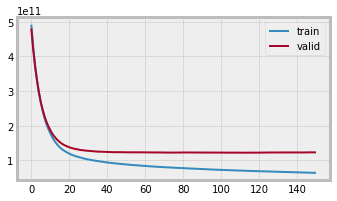

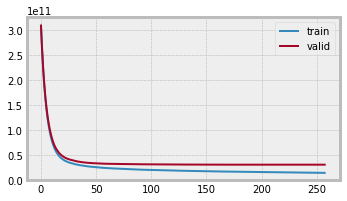

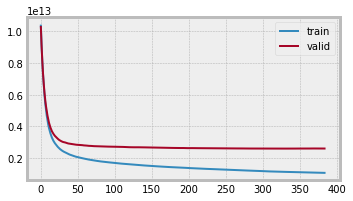

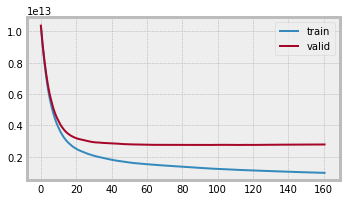

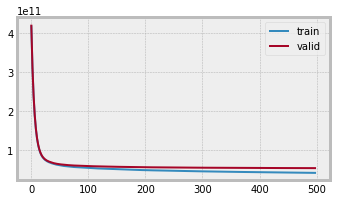

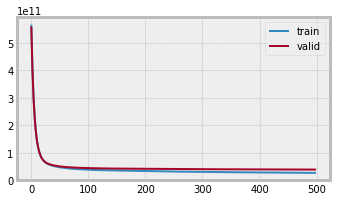

In [12]:
# Main loop
list_imp = list()
list_res = list()
list_out = list()

feat_target = 'Amount'
feats_used = feats_cat + feats_num + feats_dt

filt_fold  = df.fold == 0
filt_null  = ~df[feat_target + ' RANK'].between(delta,1-delta)

for set_property in df_gr.index:
    for set_time in df_gr.columns:
        # Sets creation
        f1 = df['Property Type CLEAN'] == set_property
        f2 = df['tr_split'] == set_time
        filt_set   = f1&f2

        filt_train = ~filt_fold & ~filt_null & filt_set
        filt_valid = filt_fold & ~filt_null & filt_set
        filt_test  = filt_null & filt_set

        x, y   = df[filt_train][feats_used], df[filt_train][feat_target]
        xv, yv = df[filt_valid][feats_used], df[filt_valid][feat_target]
        xt, yt = df[filt_test][feats_used],  df[filt_test][feat_target]

        print(x.shape, xv.shape, xt.shape)
        print(round(y.mean()),round(yv.mean()),round(yt.mean()))


        # Training process
        import lightgbm as lgb

        x_ = lgb.Dataset(x.values, 
                        label = y, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xv_ = lgb.Dataset(xv.values, 
                        label = yv, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xt_ = lgb.Dataset(xt.values, 
                        label = yt, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)

        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',

            'learning_rate': 0.1,
            'num_boost_round': 500,
            'early_stopping_rounds': 50,

            'nthread': -1,
            'verbose': 0,

            # fitting params
            'boost_from_average': True,
            'scale_pos_weight': 1,

            'max_bin': 255,

            'num_leaves': 63,
            'max_depth': -1,
            'min_child_samples': 20,
            'min_child_weight': 1e-3,
            'min_split_gain': 0,

            'subsample': 1,
            'colsample_bytree': 1,

            'reg_alpha': 0, 
            'reg_lambda': 0,

        }

        evals_results = {}
        model_lgb     = lgb.train(params,
                                x_,
                                valid_sets=[x_, xv_ ], 
                                valid_names=['train', 'valid'], 
                                evals_result=evals_results, 
                                verbose_eval=1000, 
                                feval=None)
        p = pd.DataFrame(dict([(k,evals_results[k]['l2']) for k in evals_results])).plot(figsize = (5,3))
        
        # feature importances
        df_imp = pd.Series(model_lgb.feature_importance(), index = feats_used)
        df_imp = df_imp/sum(df_imp)
        df_imp = df_imp.reset_index()
        df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
        df_imp = df_imp.sort_values(by = 'imp')
        df_imp['time'] = set_time
        df_imp['property'] = set_property
        
        # results
        pred = model_lgb.predict(xv)
        pred = pred.clip(min = y.min(), max = y.max())
        df_res = yv.reset_index()
        del df_res['index']
        df_res['pred'] = pred
        df_res['mae'] = abs(df_res[feat_target] - df_res['pred'])
        df_res['mape'] = df_res['mae'] / df_res[feat_target]
        df_res['Property Size (sq.m)'] = xv['Property Size (sq.m)'].values
        df_res['time'] = set_time
        df_res['property'] = set_property
        
        out = list()
        out2 = list()
        n = df_res.shape[0]
        list_t = [0]
        for t in list_t:
            filt = df_res[feat_target] > t
            out.append(ts_metrics(df_res[filt][feat_target], df_res[filt].pred))
            out2.append(df_res[filt].shape[0] / n)
        df_out = pd.DataFrame(out)
        df_out['time'] = set_time
        df_out['property'] = set_property
        
        # collect results
        list_imp.append(df_imp)
        list_res.append(df_res)
        list_out.append(df_out)

In [13]:
df_out1 = pd.concat(list_out).groupby(['property','time']).min().unstack()
df_out1

mae                         mape              
time     1. Before 2018 2. After 2018 1. Before 2018 2. After 2018
property                                                          
Building   204,225.7470  105,548.5060         0.1082        0.0557
Land       820,373.3043  775,657.0982         0.2187        0.1870
Unit       139,527.3525  112,191.5721         0.1294        0.0981

In [14]:
df_imp1 = pd.concat(list_imp).groupby(['property','time','feat']).min().unstack().T
df_imp1

property                                Building                         Land  \
time                              1. Before 2018 2. After 2018 1. Before 2018   
    feat                                                                        
imp Nearest Landmark CLEAN LABEL          0.0171        0.0211         0.0197   
    Nearest Mall CLEAN LABEL              0.0018        0.0014         0.0072   
    Nearest Metro CLEAN LABEL             0.0244        0.0151         0.0494   
    No. of Buyer                          0.0358        0.0333         0.0254   
    No. of Seller                         0.0254        0.0228         0.0334   
    Parking                               0.0000        0.0000         0.0000   
    Project CLEAN LABEL                   0.0359        0.0800         0.0240   
    Property Size (sq.m)                  0.4339        0.3948         0.3632   
    Property Sub Type CLEAN LABEL         0.0000        0.0000         0.0200   
    Property Type CLEAN LABEL             0.0000        0.0000         0.0000   
    Room(s) CLEAN LABEL                   0.0331        0.0255         0.0000   
    Usage CLEAN LABEL                     0.0000        0.0000         0.0241   
    free_hold                             0.0003        0.0000         0.0162   
    reg_ready                             0.0156        0.0302         0.0000   
    region LABEL                          0.0192        0.0177         0.0583   
    sector                                0.0521        0.0541         0.0486   
    tr_month                              0.1650        0.1746         0.1780   
    tr_year                               0.1405        0.1293         0.1323   

property                                                  Unit                
time                              2. After 2018 1. Before 2018 2. After 2018  
    feat                                                                      
imp Nearest Landmark CLEAN LABEL         0.0354         0.0103        0.0081  
    Nearest Mall CLEAN LABEL             0.0105         0.0012        0.0010  
    Nearest Metro CLEAN LABEL            0.0580         0.0366        0.0292  
    No. of Buyer                         0.0170         0.0265        0.0182  
    No. of Seller                        0.0217         0.0178        0.0108  
    Parking                              0.0000         0.0041        0.0238  
    Project CLEAN LABEL                  0.0448         0.1382        0.1437  
    Property Size (sq.m)                 0.3386         0.3544        0.3902  
    Property Sub Type CLEAN LABEL        0.0289         0.0073        0.0047  
    Property Type CLEAN LABEL            0.0000         0.0000        0.0000  
    Room(s) CLEAN LABEL                  0.0000         0.0289        0.0239  
    Usage CLEAN LABEL                    0.0223         0.0000        0.0000  
    free_hold                            0.0184         0.0022        0.0007  
    reg_ready                            0.0000         0.0141        0.0223  
    region LABEL                         0.0726         0.0234        0.0223  
    sector                               0.0629         0.0195        0.0261  
    tr_month                             0.1501         0.1838        0.1748  
    tr_year                              0.1187         0.1317        0.1002

In [15]:
df_res1 = pd.concat(list_res)
df_res1[:3]

,Amount,pred,mae,mape,Property Size (sq.m),time,property
0,"1,800,000.0000","1,892,572.7582","92,572.7582",0.0514,178.2900,1. Before 2018,Building
1,"2,100,000.0000","2,419,329.9037","319,329.9037",0.1521,178.2900,1. Before 2018,Building
2,"2,650,000.0000","2,348,989.1688","301,010.8312",0.1136,872.5400,1. Before 2018,Building


### Training (log target)

(9504, 18) (3061, 18) (1410, 18)
15 15 15
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	train's l2: 0.016917	valid's l2: 0.030022
(16539, 18) (5449, 18) (2433, 18)
14 14 15
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with under

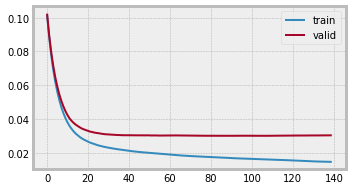

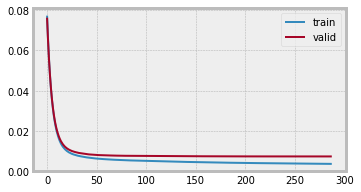

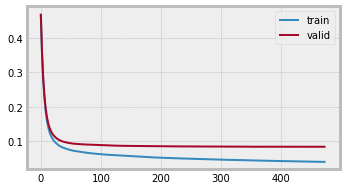

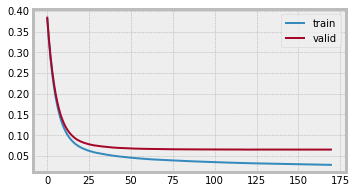

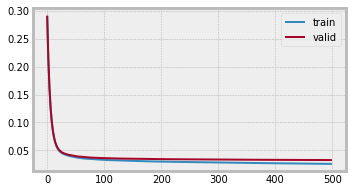

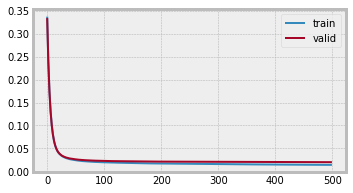

In [18]:
# Main loop
list_imp = list()
list_res = list()
list_out = list()

feat_target = 'Amount LOG'
feats_used = feats_cat + feats_num + feats_dt

filt_fold  = df.fold == 0
filt_null  = ~df[feat_target[:-4] + ' RANK'].between(delta,1-delta)

for set_property in df_gr.index:
    for set_time in df_gr.columns:
        # Sets creation
        f1 = df['Property Type CLEAN'] == set_property
        f2 = df['tr_split'] == set_time
        filt_set   = f1&f2

        filt_train = ~filt_fold & ~filt_null & filt_set
        filt_valid = filt_fold & ~filt_null & filt_set
        filt_test  = filt_null & filt_set

        x, y   = df[filt_train][feats_used], df[filt_train][feat_target]
        xv, yv = df[filt_valid][feats_used], df[filt_valid][feat_target]
        xt, yt = df[filt_test][feats_used],  df[filt_test][feat_target]

        print(x.shape, xv.shape, xt.shape)
        print(round(y.mean()),round(yv.mean()),round(yt.mean()))

        # Training process
        import lightgbm as lgb

        x_ = lgb.Dataset(x.values, 
                        label = y, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xv_ = lgb.Dataset(xv.values, 
                        label = yv, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)
        xt_ = lgb.Dataset(xt.values, 
                        label = yt, 
                        feature_name = feats_used,
                        categorical_feature = feats_cat,
                        free_raw_data=False)

        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',

            'learning_rate': 0.1,
            'num_boost_round': 500,
            'early_stopping_rounds': 50,

            'nthread': -1,
            'verbose': 0,

            # fitting params
            'boost_from_average': True,
            'scale_pos_weight': 1,

            'max_bin': 255,

            'num_leaves': 63,
            'max_depth': -1,
            'min_child_samples': 20,
            'min_child_weight': 1e-3,
            'min_split_gain': 0,

            'subsample': 1,
            'colsample_bytree': 1,

            'reg_alpha': 0, 
            'reg_lambda': 0,

        }

        evals_results = {}
        model_lgb     = lgb.train(params,
                                x_,
                                valid_sets=[x_, xv_ ], 
                                valid_names=['train', 'valid'], 
                                evals_result=evals_results, 
                                verbose_eval=1000, 
                                feval=None)

        p = pd.DataFrame(dict([(k,evals_results[k]['l2']) for k in evals_results])).plot(figsize = (5,3))
        
        # feature importances
        df_imp = pd.Series(model_lgb.feature_importance(), index = feats_used)
        df_imp = df_imp/sum(df_imp)
        df_imp = df_imp.reset_index()
        df_imp.rename(columns={'index':'feat',0:'imp'}, inplace = True)
        df_imp = df_imp.sort_values(by = 'imp')
        df_imp['time'] = set_time
        df_imp['property'] = set_property
        
        # results
        pred = model_lgb.predict(xv)
        pred = list(map(np.expm1, pred))
        df_res = yv.map(np.expm1).reset_index()
        del df_res['index']
        df_res['pred'] = pred
        df_res['mae'] = abs(df_res[feat_target] - df_res['pred'])
        df_res['mape'] = df_res['mae'] / df_res[feat_target]
        df_res['Property Size (sq.m)'] = xv['Property Size (sq.m)'].values
        df_res['time'] = set_time
        df_res['property'] = set_property
        
        out = list()
        out2 = list()
        n = df_res.shape[0]
        list_t = [0]
        for t in list_t:
            filt = df_res[feat_target] > t
            out.append(ts_metrics(df_res[filt][feat_target], df_res[filt].pred))
            out2.append(df_res[filt].shape[0] / n)
        df_out = pd.DataFrame(out)
        df_out['time'] = set_time
        df_out['property'] = set_property
        
        # collect results
        list_imp.append(df_imp)
        list_res.append(df_res)
        list_out.append(df_out)

In [19]:
df_out2 = pd.concat(list_out).groupby(['property','time']).min().unstack()
df_out2

mae                         mape              
time     1. Before 2018 2. After 2018 1. Before 2018 2. After 2018
property                                                          
Building   207,437.9750  105,255.9451         0.1061        0.0549
Land       797,169.4418  749,807.7693         0.1864        0.1589
Unit       141,138.5697  111,513.5129         0.1237        0.0917

In [20]:
df_imp2 = pd.concat(list_imp).groupby(['property','time','feat']).min().unstack().T
df_imp2

property                                Building                         Land  \
time                              1. Before 2018 2. After 2018 1. Before 2018   
    feat                                                                        
imp Nearest Landmark CLEAN LABEL          0.0161        0.0197         0.0210   
    Nearest Mall CLEAN LABEL              0.0038        0.0030         0.0083   
    Nearest Metro CLEAN LABEL             0.0254        0.0143         0.0429   
    No. of Buyer                          0.0387        0.0321         0.0268   
    No. of Seller                         0.0299        0.0191         0.0313   
    Parking                               0.0000        0.0000         0.0000   
    Project CLEAN LABEL                   0.0419        0.0825         0.0316   
    Property Size (sq.m)                  0.4296        0.3989         0.3657   
    Property Sub Type CLEAN LABEL         0.0000        0.0000         0.0167   
    Property Type CLEAN LABEL             0.0000        0.0000         0.0000   
    Room(s) CLEAN LABEL                   0.0339        0.0228         0.0000   
    Usage CLEAN LABEL                     0.0000        0.0000         0.0234   
    free_hold                             0.0004        0.0000         0.0122   
    reg_ready                             0.0145        0.0296         0.0000   
    region LABEL                          0.0192        0.0160         0.0562   
    sector                                0.0453        0.0502         0.0454   
    tr_month                              0.1577        0.1858         0.1854   
    tr_year                               0.1435        0.1259         0.1331   

property                                                  Unit                
time                              2. After 2018 1. Before 2018 2. After 2018  
    feat                                                                      
imp Nearest Landmark CLEAN LABEL         0.0387         0.0114        0.0116  
    Nearest Mall CLEAN LABEL             0.0108         0.0019        0.0015  
    Nearest Metro CLEAN LABEL            0.0600         0.0402        0.0341  
    No. of Buyer                         0.0167         0.0298        0.0182  
    No. of Seller                        0.0273         0.0222        0.0135  
    Parking                              0.0000         0.0055        0.0260  
    Project CLEAN LABEL                  0.0740         0.1544        0.1651  
    Property Size (sq.m)                 0.3158         0.3326        0.3535  
    Property Sub Type CLEAN LABEL        0.0284         0.0079        0.0063  
    Property Type CLEAN LABEL            0.0000         0.0000        0.0000  
    Room(s) CLEAN LABEL                  0.0000         0.0274        0.0268  
    Usage CLEAN LABEL                    0.0267         0.0000        0.0000  
    free_hold                            0.0188         0.0043        0.0018  
    reg_ready                            0.0000         0.0128        0.0219  
    region LABEL                         0.0786         0.0225        0.0247  
    sector                               0.0599         0.0221        0.0316  
    tr_month                             0.1337         0.1780        0.1645  
    tr_year                              0.1108         0.1270        0.0986

In [21]:
df_res2 = pd.concat(list_res)
df_res2[:3]

,Amount LOG,pred,mae,mape,Property Size (sq.m),time,property
0,"1,799,999.0000","1,860,649.3103","60,650.3103",0.0337,178.2900,1. Before 2018,Building
1,"2,099,999.0000","2,143,152.5644","43,153.5644",0.0205,178.2900,1. Before 2018,Building
2,"2,649,999.0000","2,310,925.6694","339,073.3306",0.1280,872.5400,1. Before 2018,Building
